
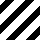
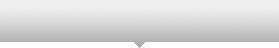
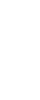
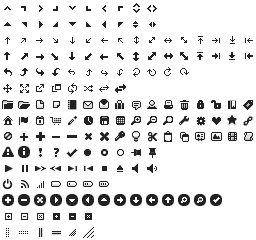
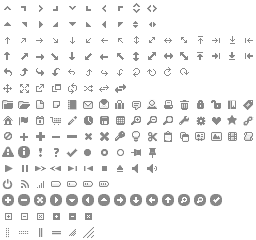
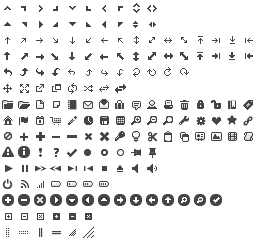
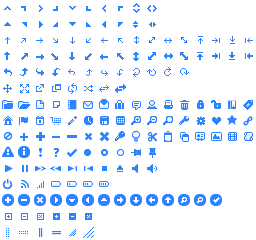
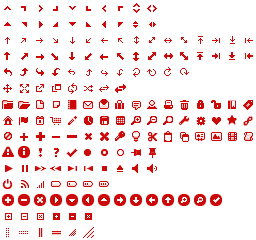
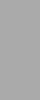
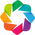
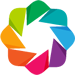
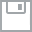
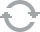
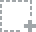
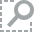
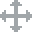
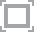
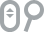

In [33]:
import pickle 
import numpy as np
from bokeh.plotting import figure,  show
from bokeh.io import output_notebook
output_notebook()

In [34]:
data = pickle.load(open('./vac_data.pkl',"rb"))

In [35]:
data.keys()

['vac', 'event']

In [82]:
v = [d[0] for d in data["vac"]]
t = [d[1] for d in data["vac"]]
events = data["event"]
event_names = set([e[0] for e in events])
print event_names
out_events = []
todo = ["part_not_found","part_found","place_complete","z_down"]
for event in event_names:
    temp = [e[1] for e in events if event in e]
    out_events.append(temp)


set(['vacuum_off', 'solenoid_off', 'vacuum_on', 'place_complete', 'placing', 'inspect', 'travel_z', 'part_not_found', 'goto_place', 'z_down', 'part_found', 'pick', 'place'])


In [85]:
p = figure(title="TEST", x_axis_label='vac', y_axis_label='time')
# add a line renderer with legend and line thickness
p.line(t,v)
import random
r = lambda: random.randint(0,255)
colors = ['#{:02x}{:02x}{:02x}'.format(r(),r(),r()) for i in range(0,len(out_events))]
for e,c,n in zip(out_events,colors,event_names):
    if( n in todo ):
        y = np.ones([1,len(e)])
        y = y * 400
        p.ray(x=e,y=y[0],angle=np.pi/2,length=800,color=c,line_width=1,legend=n)

# show the results
show(p)

In [61]:
[i for i in range(0,10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]